In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score,cross_val_predict
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv('cell2celltrain.csv')
train = train.dropna().drop_duplicates()
X_train = train.drop(['Churn'],axis=1)
y_train = train['Churn']
X_test = pd.read_csv('cell2cellholdout.csv')
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(49752, 57)
(49752,)
(20000, 58)


In [2]:
from sklearn.preprocessing import LabelBinarizer
lbin = LabelBinarizer()
y_train = lbin.fit_transform(y_train)
X_train = X_train.select_dtypes(include=['float64','int64'])
print(X_train.shape)

(49752, 35)


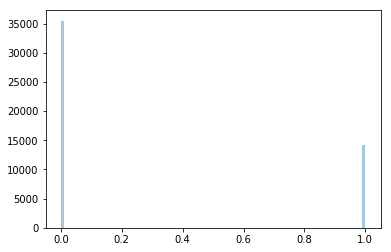

In [3]:
sns.distplot(y_train, bins=100,kde=False)
plt.show()

In [11]:
# reducing dimensionality

from sklearn.decomposition import PCA

decompose = [PCA(n_components = 2), PCA(n_components = 3), PCA(n_components = 5), PCA(n_components = 7)]
train_datas = []
for model in decompose:
    train_datas.append(model.fit_transform(X_train))

kmeans = KMeans(n_clusters=2)
for data in train_datas:
    kmeans.fit(data)
    correct = 0
    for i in range(len(data)):
        predict_me = np.array(data[i].astype(float))
        predict_me = predict_me.reshape(-1, len(predict_me))
        prediction = kmeans.predict(predict_me)
        if prediction[0] == y_train[i]:
            correct += 1
    print(correct/len(data))

0.4931259044862518
0.4931058047917672
0.5071956906255025
0.49296510693037465


In [5]:
enc1 = cluster_target_encoder()
labels_train =  

SyntaxError: invalid syntax (<ipython-input-5-68ce9a73ac06>, line 2)